In [5]:
#loading libraries
import torch
import librosa
import numpy as np
import soundfile as sf
from scipy.io import wavfile
from IPython.display import Audio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

In [6]:
#using pretrained model.
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
C:\Users\colto\anaconda3\lib\site-packages\transformers\models\wav2vec2\tokenization_wav2vec2.py:421: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(


Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
#found file on internet
file_name = '527428.wav'
Audio(file_name)

In [12]:
#finding sampling rate
data = wavfile.read(file_name)
framerate = data[0]
sounddata = data[1]
time = np.arange(0,len(sounddata))/framerate
print('Sampling rate:',framerate,'Hz')

Sampling rate: 44100 Hz


C:\Users\colto\AppData\Local\Temp/ipykernel_41968/2207281406.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  data = wavfile.read(file_name)


In [13]:
#changing sampling rate to 16000
input_audio, _ = librosa.load(file_name, sr=16000)

In [14]:
#got it right
input_values = tokenizer(input_audio, return_tensors="pt").input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = tokenizer.batch_decode(predicted_ids)[0]
print(transcription)

AH IT'S SUCH A LOVELY DAY TO DAY THE WEATHER IS GOOD I FEEL GOOD I WONDER WHAT'S HAPPENING OUTSIDE I THINK THERE'S A MESSAGE OUT THERE FOR YOU LET'S GO HAVE A LOOK


https://arxiv.org/abs/2006.11477
very new process to do this with this paper. Only been around since Oct 2021.

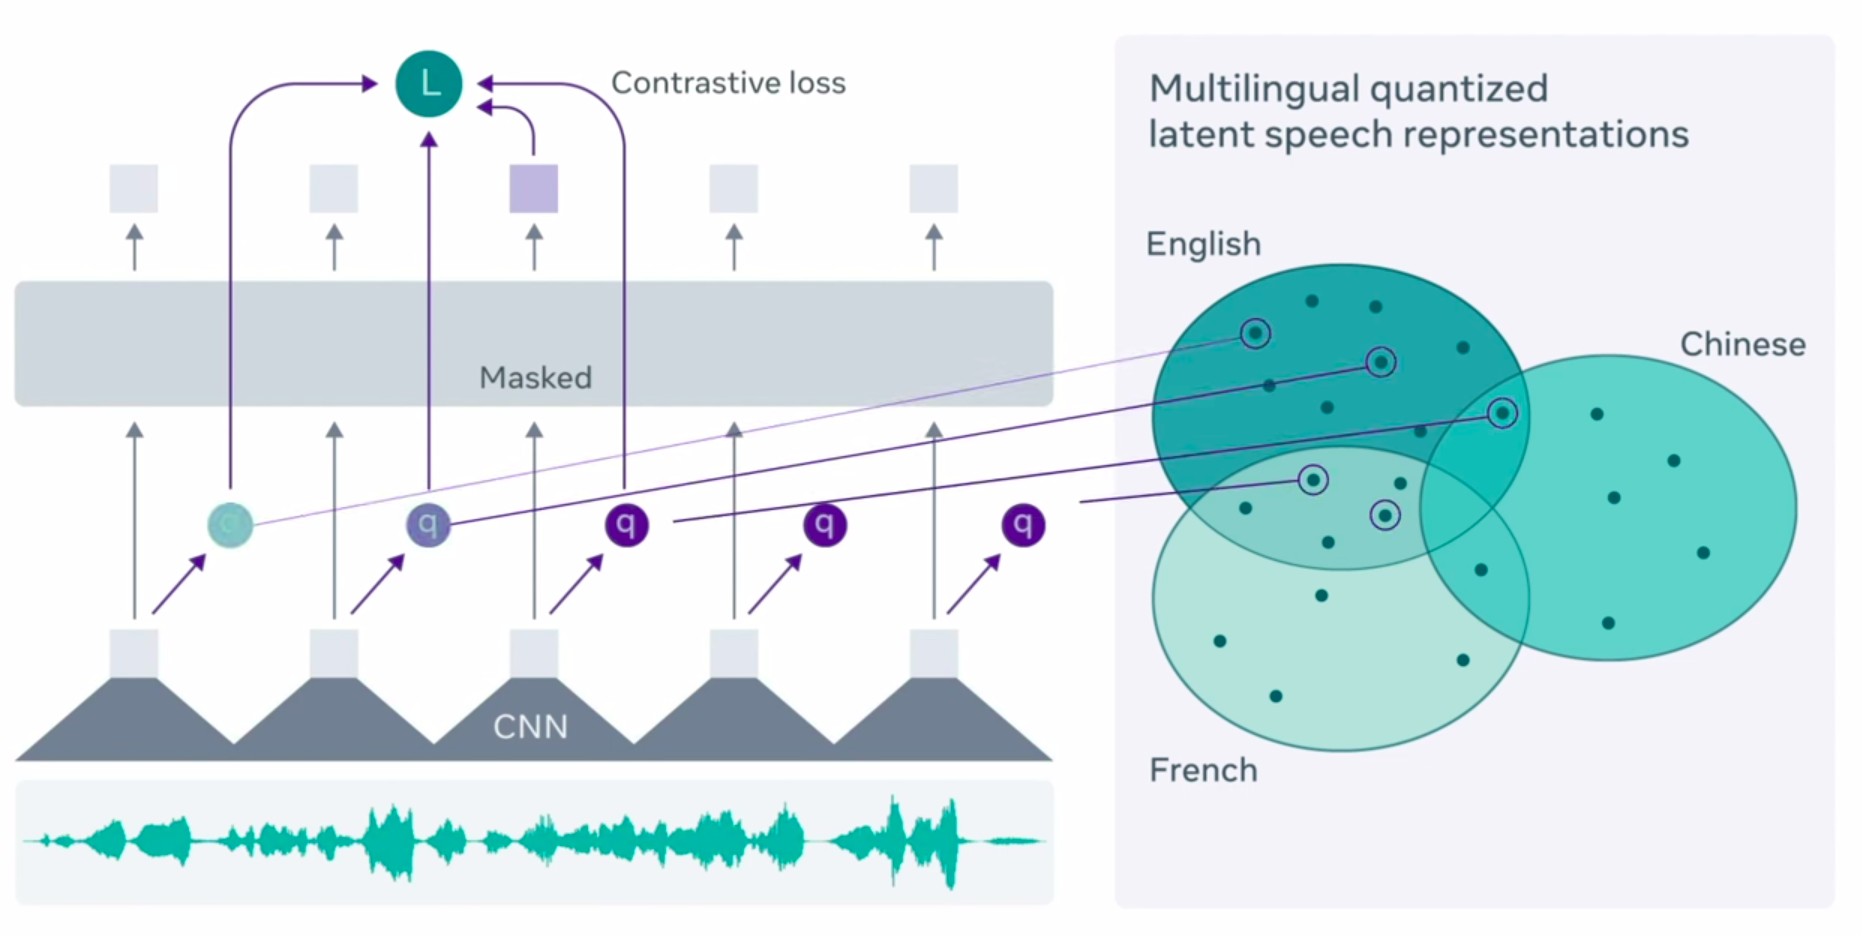

Wav2Vec graphical representation